In [ ]:
import matplotlib

In [ ]:
%matplotlib tk

In [8]:
import holopy as hp, numpy as np
from holopy.scattering import calc_holo,Sphere
def simulateholo(detec,ind,wavel,pl,material,radi):#function to simulate the hologram by scattering
    if(material=='gold'):
        au=Sphere(n=0.2+2.9j,r=radi,center=(12.5,12.5,1))#gold particle specification
        s_holo=calc_holo(detec,au,ind,wavel,pl)
        hp.save_image('gold_particle',s_holo)
        hp.save('gold_with_metadata',s_holo)
    if(material=="glass"):
        glass=Sphere(n=1.52,r=radi,center=(7,7,1))#glass particle specification
        s_holo=calc_holo(detec,glass,ind,wavel,pl)
        hp.save_image('glass_particle',s_holo)
        hp.save('glass_with_metadata',s_holo)
    if(material=="polystrene"):
        poly=Sphere(n=1.59,r=radi,center=(7,7,1))#polystrene particle specification
        s_holo=calc_holo(detec,poly,ind,wavel,pl)
        hp.save_image('poly_particle',s_holo)
        hp.save('poly_with_metadata',s_holo)
print("Enter the particle type from gold,glass or polystrene")
matt=input()
print("Enter the radius of the particle")
radius=float(input())
med_n=1 #air
wl=0.66 #red light
pol=(1,1) #polarization
camera=hp.detector_grid(shape=250, spacing=0.1)#detector screen
simulateholo(camera,med_n,wl,pol,matt,radius)
hp.show(s_holo)

Enter the particle type from gold,glass or polystrene
gold
Enter the radius of the particle
0.1


C:\ProgramData\Anaconda3\lib\site-packages\holopy\core\tests\exampledata\image01.jpg


C:\ProgramData\Anaconda3\lib\site-packages\holopy\core\io\vis.py:264: UserWarning: Image contains complex values. Taking image magnitude.
  warn("Image contains complex values. Taking image magnitude.")


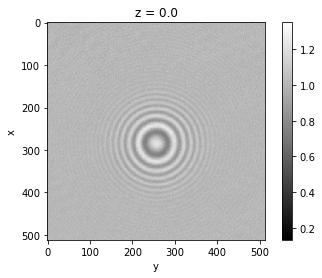

In [3]:
import numpy as np
import holopy as hp
from holopy.core.io import get_example_data_path, load_average
from holopy.core.process import bg_correct

imagepath = get_example_data_path('image01.jpg')
print(imagepath)
raw_holo = hp.load_image(imagepath, spacing = 0.0851, medium_index = 1.33, illum_wavelen = 0.66 )
bgpath = get_example_data_path(['bg01.jpg','bg02.jpg','bg03.jpg'])
bg = load_average(bgpath, refimg = raw_holo)
holo = bg_correct(raw_holo, bg)

zstack = np.linspace(0, 20, 11)

rec_vol = hp.propagate(holo, zstack)
hp.show(rec_vol)


In [ ]:
import holopy as hp, numpy as np
from mayavi import mlab
from holopy.core.io import get_example_data_path
from holopy.scattering import calc_holo,Sphere
from mayavi.mlab import *
from holopy.scattering import Spheres,Sphere
camera=hp.detector_grid(shape=150, spacing=0.1)
s1 = Sphere(center=(5, 5, 5), n = 1.59, r = .5)
s2 = Sphere(center=(4, 4, 5), n = 1.59, r = .5)
collection = Spheres([s1, s2])
med_n=1 #air
wl=0.66 #red light
pol=(1,0)
holo = calc_holo(camera, collection,med_n,wl,pol)
hp.show(holo)
rr=0.5

[phi, theta] = np.mgrid[0:2 * np.pi:12j, 0:np.pi:12j]
x = np.cos(phi) * np.sin(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(theta)
mlab.mesh(rr * x + 5, rr * y + 5, rr * z + 5)
mlab.mesh(rr * x + 4, rr * y + 4, rr * z + 5)
mlab.show()